In [2]:
# Loading Packages

In [3]:
#importing required modules
import pandas as pd
import numpy as np

#visualisation 
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import cm
from matplotlib.colors import ListedColormap,LinearSegmentedColormap
from prettytable import PrettyTable
%matplotlib inline

#data transformation
from scipy import stats

#to ignore warnings
import warnings
warnings.filterwarnings("ignore")

#colors
colors = ['#F0D290','#DE834D','#A3423C','#781D42']
colors2 = ['#F0D290','#DE834D','#A3423C','#781D42','#671E31']
colors3 = ['#f0d290','#e9c083','#e2af77','#d99d6d','#d08c64', '#c67b5d',
           '#bc6b56','#b05a51','#a34b4d','#963b49', '#872c45','#781d42']

#xgboost
from xgboost import XGBRegressor

In [4]:
!pip install prettytable


In [5]:
ss = pd.read_csv("D:\Class Works\Machine Learning\Superstore_data.csv", encoding = 'unicode_escape')

In [6]:
ss


,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,6/12/2016,6/16/2016,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9989,9990,CA-2014-110422,1/21/2014,1/23/2014,Second Class,TB-21400,Tom Boeckenhauer,Consumer,United States,Miami,...,33180,South,FUR-FU-10001889,Furniture,Furnishings,Ultra Door Pull Handle,25.2480,3,0.20,4.1028
9990,9991,CA-2017-121258,2/26/2017,3/3/2017,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,...,92627,West,FUR-FU-10000747,Furniture,Furnishings,Tenex B1-RE Series Chair Mats for Low Pile Car...,91.9600,2,0.00,15.6332
9991,9992,CA-2017-121258,2/26/2017,3/3/2017,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,...,92627,West,TEC-PH-10003645,Technology,Phones,Aastra 57i VoIP phone,258.5760,2,0.20,19.3932
9992,9993,CA-2017-121258,2/26/2017,3/3/2017,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,...,92627,West,OFF-PA-10004041,Office Supplies,Paper,"It's Hot Message Books with Stickers, 2 3/4"" x 5""",29.6000,4,0.00,13.3200


In [7]:
ss.columns

Index(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State',
       'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category',
       'Product Name', 'Sales', 'Quantity', 'Discount', 'Profit'],
      dtype='object')

In [8]:
ss.describe()

,Row ID,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,4997.500000,55190.379428,229.858001,3.789574,0.156203,28.656896
std,2885.163629,32063.693350,623.245101,2.225110,0.206452,234.260108
min,1.000000,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,2499.250000,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,4997.500000,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,7495.750000,90008.000000,209.940000,5.000000,0.200000,29.364000
max,9994.000000,99301.000000,22638.480000,14.000000,0.800000,8399.976000


In [9]:
ss.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9994 non-null   int64  
 1   Order ID       9994 non-null   object 
 2   Order Date     9994 non-null   object 
 3   Ship Date      9994 non-null   object 
 4   Ship Mode      9994 non-null   object 
 5   Customer ID    9994 non-null   object 
 6   Customer Name  9994 non-null   object 
 7   Segment        9994 non-null   object 
 8   Country        9994 non-null   object 
 9   City           9994 non-null   object 
 10  State          9994 non-null   object 
 11  Postal Code    9994 non-null   int64  
 12  Region         9994 non-null   object 
 13  Product ID     9994 non-null   object 
 14  Category       9994 non-null   object 
 15  Sub-Category   9994 non-null   object 
 16  Product Name   9994 non-null   object 
 17  Sales          9994 non-null   float64
 18  Quantity

In [20]:
# here now converting Order date and Ship date from string to pandas datetime object for better operations ahead

In [12]:
# make the data columns as datetime datatype
ss['Order Date'] = pd.to_datetime(ss['Order Date'], format='%m/%d/%Y')
ss['Ship Date'] = pd.to_datetime(ss['Ship Date'], format='%m/%d/%Y')

#make columns year-month for order and ship
ss.insert(loc=3,  column='order_month_year',value=ss['Order Date'].dt.to_period('M'))
ss.insert(loc=8, column='ship_month_year', value=ss['Ship Date'].dt.to_period('M'))

#make columns with just day, month and year values for order 
ss.insert(loc=4, column='order_day', value=ss['Order Date'].dt.day)
ss.insert(loc=5, column='order_month', value=ss['Order Date'].dt.month)
ss.insert(loc=6, column='order_year', value=ss['Order Date'].dt.year)

#make columns with just day, month and year values for ship 
ss.insert(loc=9, column='ship_day', value=ss['Ship Date'].dt.day)
ss.insert(loc=10, column='ship_month', value=ss['Ship Date'].dt.month)
ss.insert(loc=11, column='ship_year', value=ss['Ship Date'].dt.year)

ss.head(7)

,Row ID,Order ID,Order Date,order_month_year,order_day,order_month,order_year,Ship Date,Ship Mode,ship_day,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,2016-11-08,2016-11,8,11,2016,2016-11-11,Second Class,11,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,2016-11-08,2016-11,8,11,2016,2016-11-11,Second Class,11,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,2016-06-12,2016-06,12,6,2016,2016-06-16,Second Class,16,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,2015-10-11,2015-10,11,10,2015,2015-10-18,Standard Class,18,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,2015-10-11,2015-10,11,10,2015,2015-10-18,Standard Class,18,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164
5,6,CA-2014-115812,2014-06-09,2014-06,9,6,2014,2014-06-14,Standard Class,14,...,90032,West,FUR-FU-10001487,Furniture,Furnishings,Eldon Expressions Wood and Plastic Desk Access...,48.8600,7,0.00,14.1694
6,7,CA-2014-115812,2014-06-09,2014-06,9,6,2014,2014-06-14,Standard Class,14,...,90032,West,OFF-AR-10002833,Office Supplies,Art,Newell 322,7.2800,4,0.00,1.9656


In [16]:
# we will be splitting data into 70%(train) and 30%(test) using iloc

In [17]:
#row number calculated to 70% of rows
raw_train = ss.iloc[:6993]
raw_test = ss.iloc[6994:].drop(columns='Sales') #removing the 'Sales' column as that is going to be our target variable.

In [18]:
# creating a backup data here

In [19]:
train_original = raw_train.copy()
test_original = raw_test.copy()

In [21]:
raw_train.columns

Index(['Row ID', 'Order ID', 'Order Date', 'order_month_year', 'order_day',
       'order_month', 'order_year', 'Ship Date', 'Ship Mode', 'ship_day',
       'ship_month', 'ship_year', 'Customer ID', 'Customer Name',
       'ship_month_year', 'Segment', 'Country', 'City', 'State', 'Postal Code',
       'Region', 'Product ID', 'Category', 'Sub-Category', 'Product Name',
       'Sales', 'Quantity', 'Discount', 'Profit'],
      dtype='object')

In [22]:
# We will be dropping irrelevant columns in raw_train

In [23]:
#droping columns 'Row ID', 'Order ID', 'Customer ID', 'Customer Name', 'Product ID', 'Product Name'
raw_train.drop(columns=['Row ID', 'Order ID', 'Customer ID', 'Customer Name', 'Product ID', 'Product Name'], inplace=True)
raw_test.drop(columns=['Row ID', 'Order ID', 'Customer ID', 'Customer Name', 'Product ID', 'Product Name'], inplace=True)

raw_train.columns

Index(['Order Date', 'order_month_year', 'order_day', 'order_month',
       'order_year', 'Ship Date', 'Ship Mode', 'ship_day', 'ship_month',
       'ship_year', 'ship_month_year', 'Segment', 'Country', 'City', 'State',
       'Postal Code', 'Region', 'Category', 'Sub-Category', 'Sales',
       'Quantity', 'Discount', 'Profit'],
      dtype='object')

In [24]:
raw_test.columns

Index(['Order Date', 'order_month_year', 'order_day', 'order_month',
       'order_year', 'Ship Date', 'Ship Mode', 'ship_day', 'ship_month',
       'ship_year', 'ship_month_year', 'Segment', 'Country', 'City', 'State',
       'Postal Code', 'Region', 'Category', 'Sub-Category', 'Quantity',
       'Discount', 'Profit'],
      dtype='object')

In [25]:
# checking if any duplicates are present

In [26]:
raw_train.duplicated().sum()


np.int64(1)

In [28]:
raw_train.drop_duplicates(inplace=True)

raw_train.duplicated().sum()


np.int64(0)

In [29]:
# here, we got 0 output so no duplicates now...

In [30]:
# In this dataset, there are mainly three types of data—categorical data, numerical data and pandas datetime.

# Categorical features: Ship Mode, Segment, Country, City, State, Region, Category, Sub-Category
# Numerical features: Postal Code, Sales, Quantity, Discount, Profit
# Datetime features: Order Date, order_month_year, Ship Date, ship_month_year

In [35]:
# Univariate Analysis (Categorical Features)

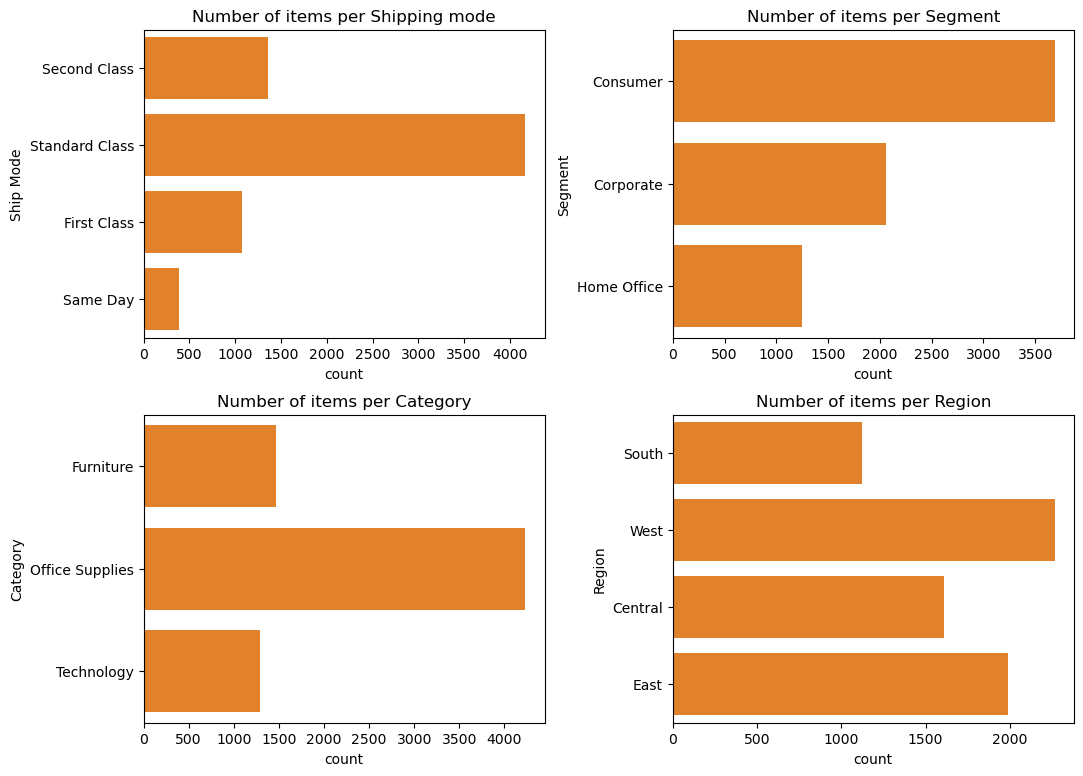

In [32]:
plt.figure(1, figsize=(12, 9))
plt.subplots_adjust(wspace=0.32,hspace=0.25)

plt.subplot(221)
sns.countplot(data=raw_train, y='Ship Mode',orient='h');
plt.title("Number of items per Shipping mode");

plt.subplot(222)
sns.countplot(data=raw_train, y='Segment',orient='h');
plt.title('Number of items per Segment');

plt.subplot(224)
sns.countplot(data=raw_train, y='Region',orient='h');
plt.title('Number of items per Region')

plt.subplot(223)
sns.countplot(data=raw_train, y='Category',orient='h');
plt.title('Number of items per Category');
plt.show()

In [33]:
# From the above graphs we can deduce:

# Around 60% of the shipment happens in 'Standard Class' mode.
# 'Consumer' segment makes up for around 50% of dataset
# 60% of the items are 'Office Supplies'
# Majority of the items in dataset are from the 'West' region

In [36]:
# Now, Numerical Features

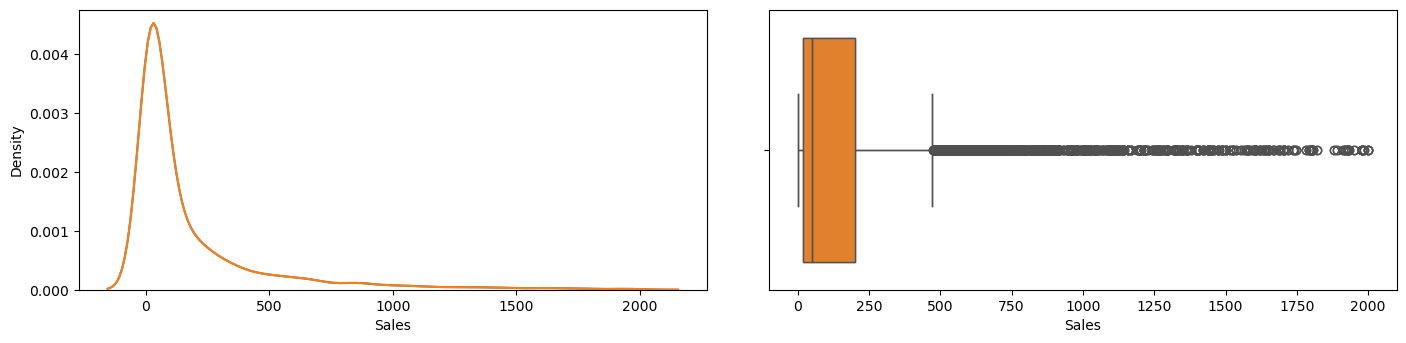

In [38]:
plt.figure(2, figsize=(17, 8))
plt.subplots_adjust(wspace=0.1);

#raw_train['Sales'] <= 2000] --> Fixing the Outliers (It is okay if you do not understand this) 
#I am doing this so that we can see the visuals better. Do not do this randomly!

plt.subplot(221)
sns.kdeplot(data=raw_train[raw_train['Sales'] <= 2000], x='Sales');

plt.subplot(222)
sns.boxplot(data=raw_train[raw_train['Sales'] <= 2000], x='Sales',orient='h');
plt.show()

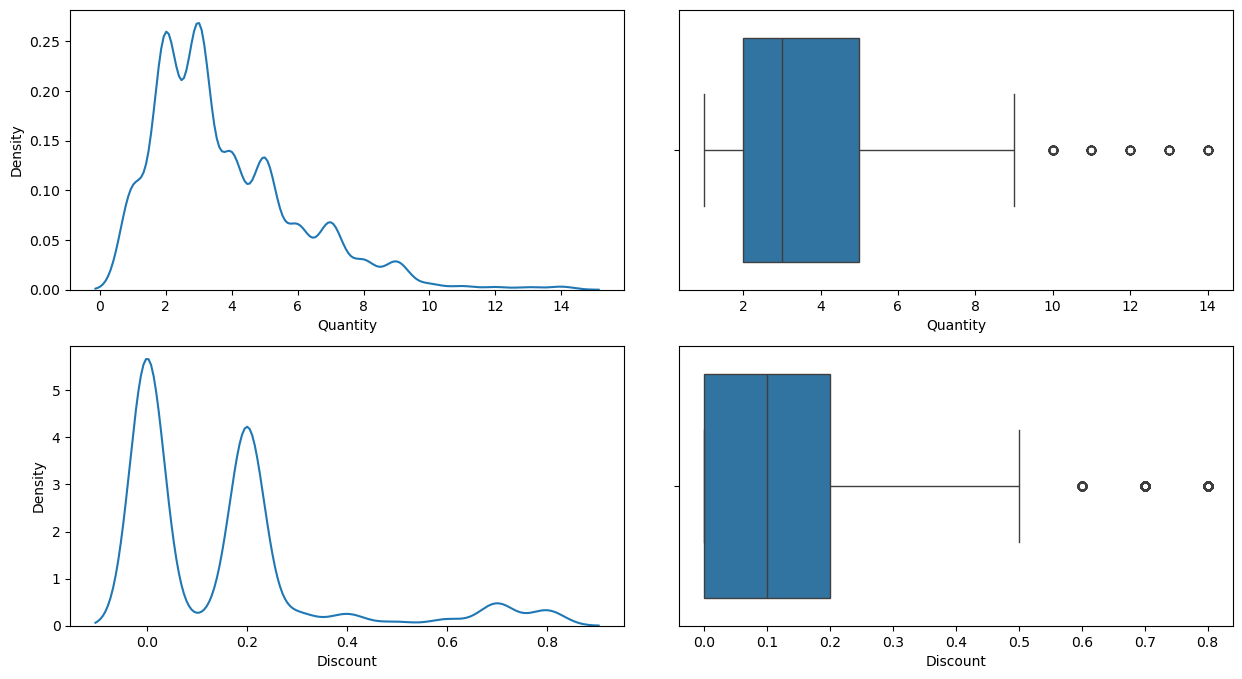

In [39]:
plt.figure(3, figsize=(15, 8))
plt.subplots_adjust(wspace=0.1);

plt.subplot(221)
sns.kdeplot(data=raw_train, x='Quantity');

plt.subplot(222)
sns.boxplot(data=raw_train, x='Quantity', orient='h');

plt.subplot(223)
sns.kdeplot(data=raw_train, x='Discount');

plt.subplot(224)
sns.boxplot(data=raw_train, x='Discount', orient='h');
plt.show()

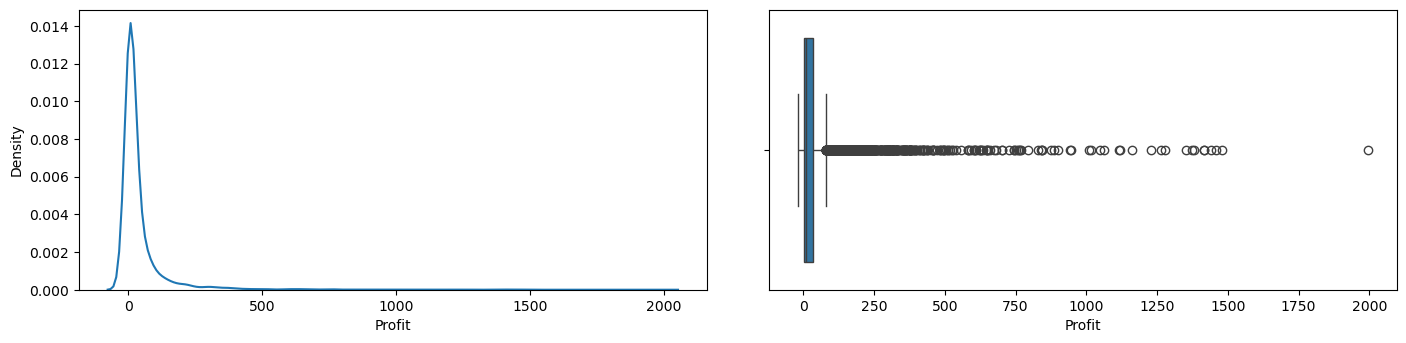

In [40]:
plt.figure(4, figsize=(17, 8))
plt.subplots_adjust(wspace=0.1);

#(raw_train['Profit'] <=2000) & (raw_train['Profit'] >= -20) --> Fixing the Outliers (It is okay if you do not understand this) 
#I am doing this so that we can see the visuals better. Do not do this randomly!

plt.subplot(221)
sns.kdeplot(data=raw_train[(raw_train['Profit'] <=2000) & (raw_train['Profit'] >= -20)], x='Profit');

plt.subplot(222)
sns.boxplot(data=raw_train[(raw_train['Profit'] <=2000) & (raw_train['Profit'] >= -20)], x='Profit', orient='h');
plt.show()

In [42]:
# Now, Performing Bi-variate Analysis
# Helps to identify the relationship between the features

In [43]:
# What is the average sales/month for the store?

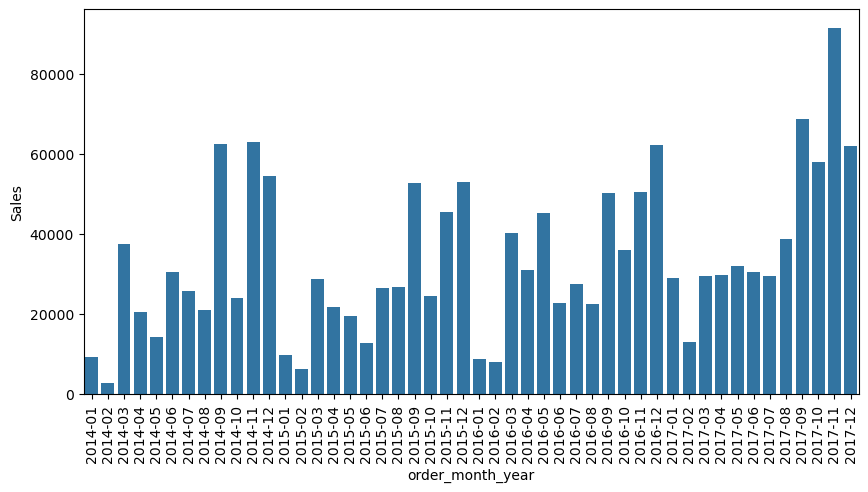

In [44]:
monthly_sales = pd.DataFrame(raw_train.groupby('order_month_year')[['Quantity','Sales']].sum()).reset_index()
plt.figure(figsize=(10, 5))
sns.barplot(x = 'order_month_year', y = 'Sales',data = monthly_sales)
plt.xticks(rotation=90)
plt.show()

In [45]:
# What is the top demanded product in United States?

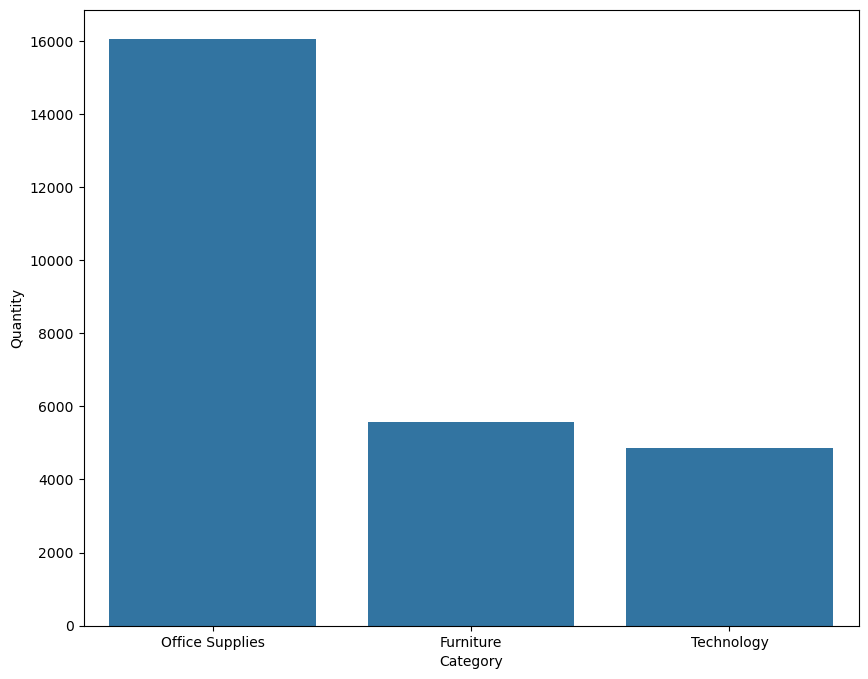

In [46]:
most_demand_qty = pd.DataFrame(raw_train.groupby('Category')['Quantity'].sum()).reset_index()
most_demand_qty.sort_values(by='Quantity', ascending=False, inplace=True)

top_catagory  = pd.DataFrame(most_demand_qty.groupby('Category')['Quantity'].sum()).reset_index()
top_catagory.sort_values(by='Quantity', ascending=False, inplace=True)

plt.figure(figsize=(10, 8))
sns.barplot(data=top_catagory, x="Category",y = 'Quantity')
plt.show()

In [47]:
# It is very clear that the most demanded product in US are office supply products.

In [ ]:
# What is the favourite shipping mode for customers?

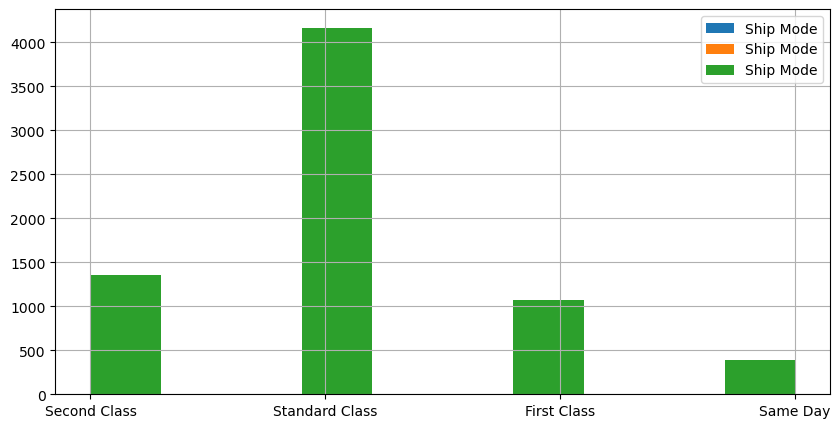

In [50]:
raw_train['Ship Mode'].hist(figsize=(10, 5), legend=True);
plt.show()

In [51]:
# It's Standard Class, no contest.

In [52]:
# Now, Time Series Analysis

In [53]:
# What are the Number of Sales/Category, Number of Sales/Mode of shipment, Number of Sales/Mode of shipment repectively?

In [54]:
regions = raw_train['Region'].unique()
shipModes = raw_train['Ship Mode'].unique()
categories = raw_train['Category'].unique()

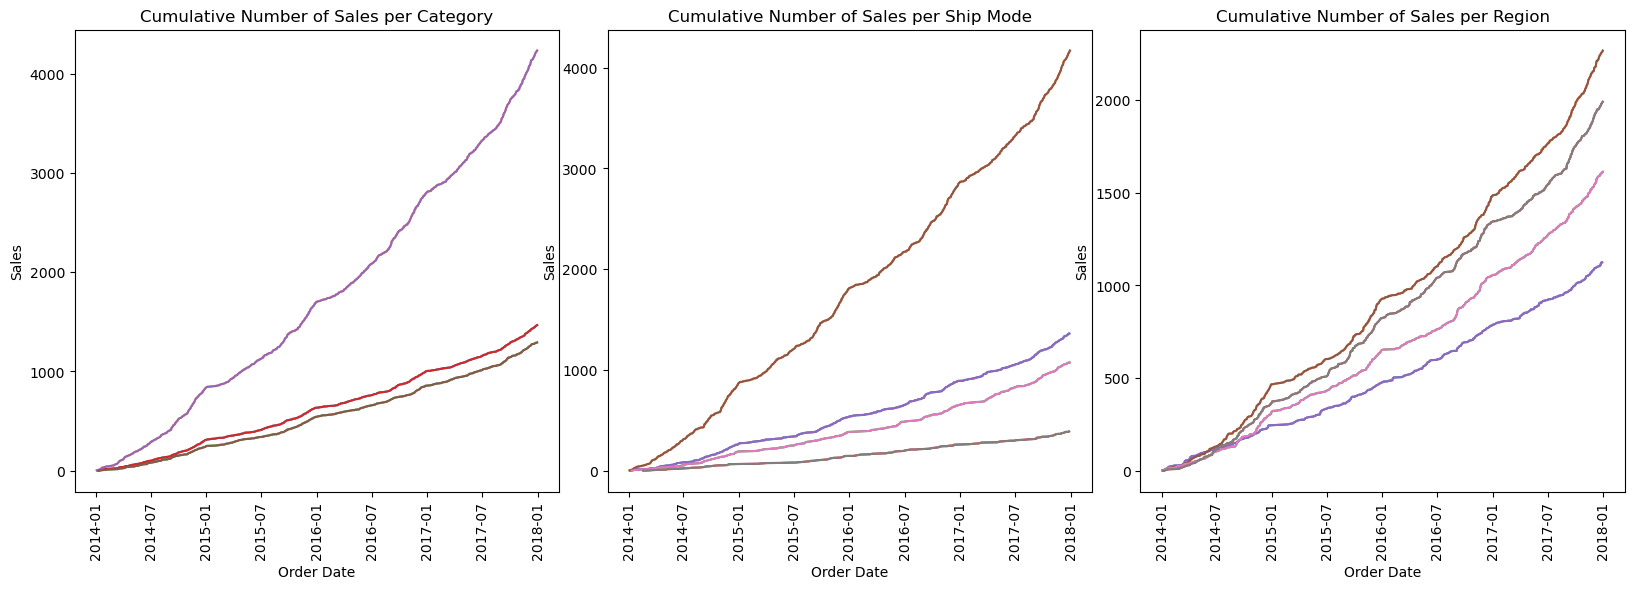

In [56]:
plt.figure(5, figsize=(20, 6))
plt.subplots_adjust(wspace=0.1);

#graphing 'Sales' vs. 'Category'
dfbyCatOrderDate = raw_train.groupby(['Category','Order Date'])
plt.subplot(131).title.set_text('Cumulative Number of Sales per Category')
plt.xticks(rotation=90) 
for cat in categories:
    data = dfbyCatOrderDate['Sales'].count()[cat]
    data = data.cumsum()
    sns.lineplot(data=data, ax=plt.subplot(131))

#graphing 'Sales' vs. 'Ship Mode'
dfbyShipOrderDate = raw_train.groupby(['Ship Mode','Order Date'])
plt.subplot(132).title.set_text('Cumulative Number of Sales per Ship Mode')
plt.xticks(rotation=90)
for shipMode in shipModes:
    data = dfbyShipOrderDate['Sales'].count()[shipMode]
    data = data.cumsum()
    sns.lineplot(data=data, ax=plt.subplot(132))
    
#graphing 'Sales' vs. 'Region'
dfbyRegionOrderDate = raw_train.groupby(['Region','Order Date'])
plt.subplot(133).title.set_text('Cumulative Number of Sales per Region')
plt.xticks(rotation=90)
for region in regions:
    data = dfbyRegionOrderDate['Sales'].count()[region]
    data = data.cumsum()
    sns.lineplot(data=data, ax=plt.subplot(133))

plt.show()    

In [57]:
# We can see that the sales have increased over the years indicating that the superstore business is doing well 
# and might also be profitable. Looking at the graph we can also infer that at the end of each year there is rise in the sales,
# attributing to the fact that it is holiday season around this time.

In [58]:
# What are the Sales for each Region?

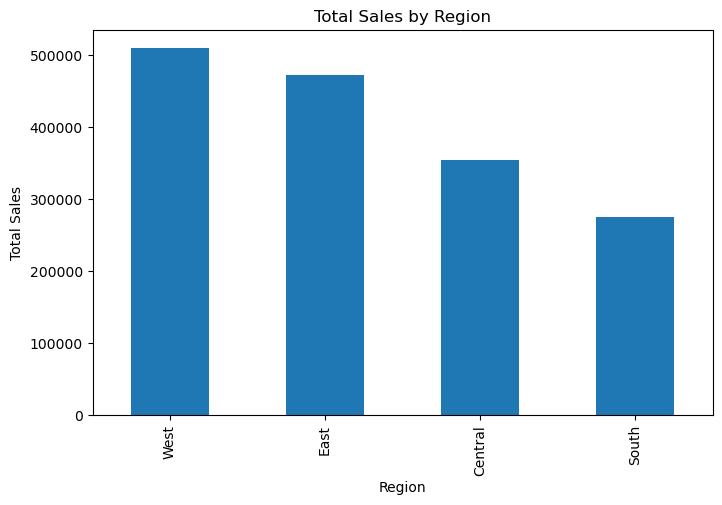

In [60]:
plt.figure(7, figsize=(8, 5))

dfByRegion = raw_train.groupby('Region')

dfByRegion['Sales'].sum().sort_values(ascending=False).plot(kind='bar')
plt.ylabel('Total Sales');
plt.title("Total Sales by Region");
plt.show()

In [61]:
# Which Region is Profitable to the superstore?

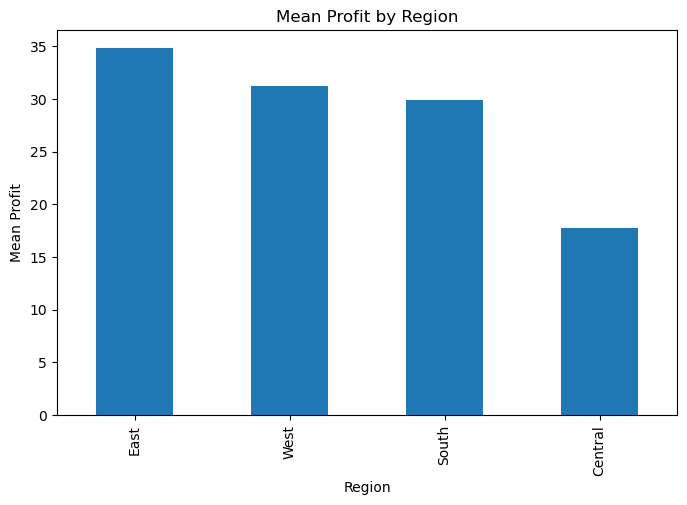

In [63]:
plt.figure(6, figsize=(8, 5))

# dfByRegion = raw_train.groupby('Region')

dfByRegion['Profit'].mean().sort_values(ascending=False).plot(kind='bar');
plt.ylabel('Mean Profit');
plt.title("Mean Profit by Region");
plt.show()

In [64]:
# We see that although the Central region has more sales than the South region, the South region is way more profitable.

In [65]:
# How do the Profit in different Segments compare in different Regions?

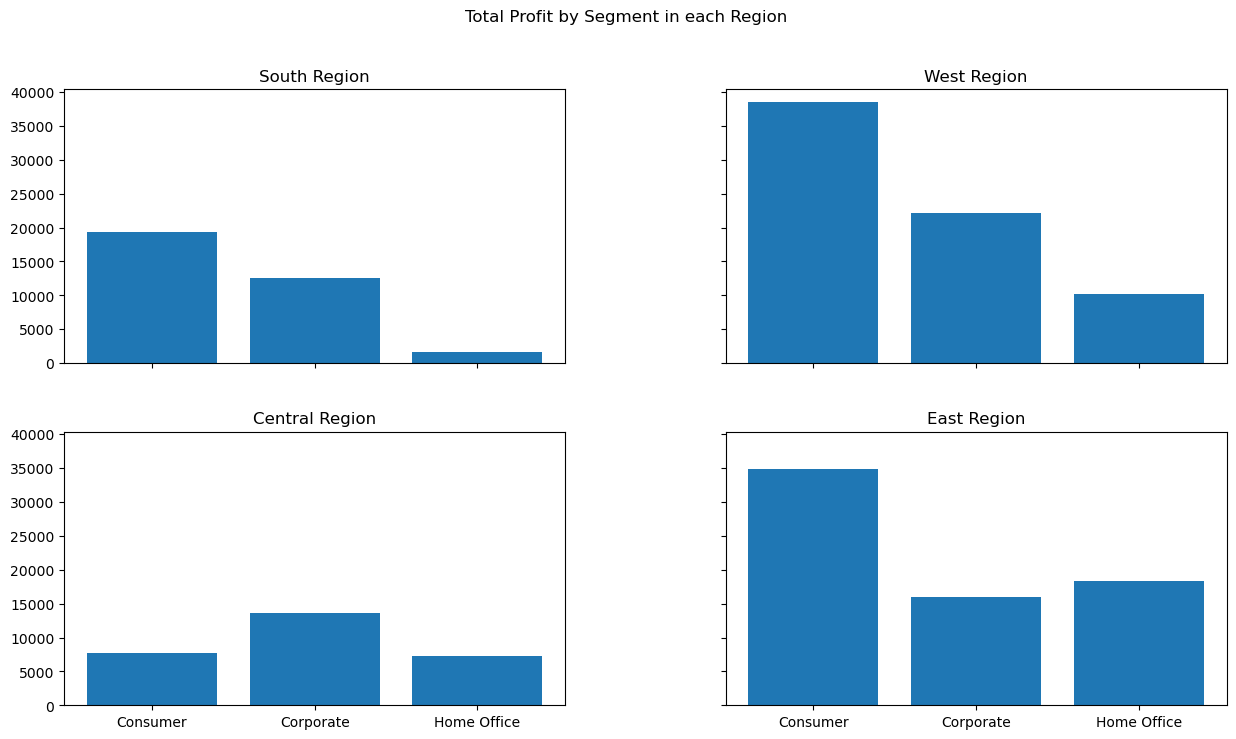

In [66]:
dfByRegionSegment = raw_train.groupby(['Region', 'Segment'])

fig, axs = plt.subplots(2,2, sharey=True, sharex=True, figsize=(15,8))
axsIdx = [[0,0], [0,1], [1,0], [1,1]]
plt.subplots_adjust(wspace=0.32,hspace=0.25);

for idx, region in enumerate(regions):
    data = dfByRegionSegment['Profit'].sum()[region]
    axs[axsIdx[idx][0],axsIdx[idx][1]].bar(data.index, data.values)
    axs[axsIdx[idx][0],axsIdx[idx][1]].title.set_text(f"{region} Region")

plt.suptitle("Total Profit by Segment in each Region")
plt.show()

In [67]:
# We can see that the Consumer Segment is responsible for the most Profit in all Regions besides the Central Region. 
# We can also see that the West and South Regions are similar with each Segment's Profits share order. 
# Another observation is that the Home Office segment is more important in the East Region.

In [68]:
# What is the Mean Profit for different Segments in different Regions?

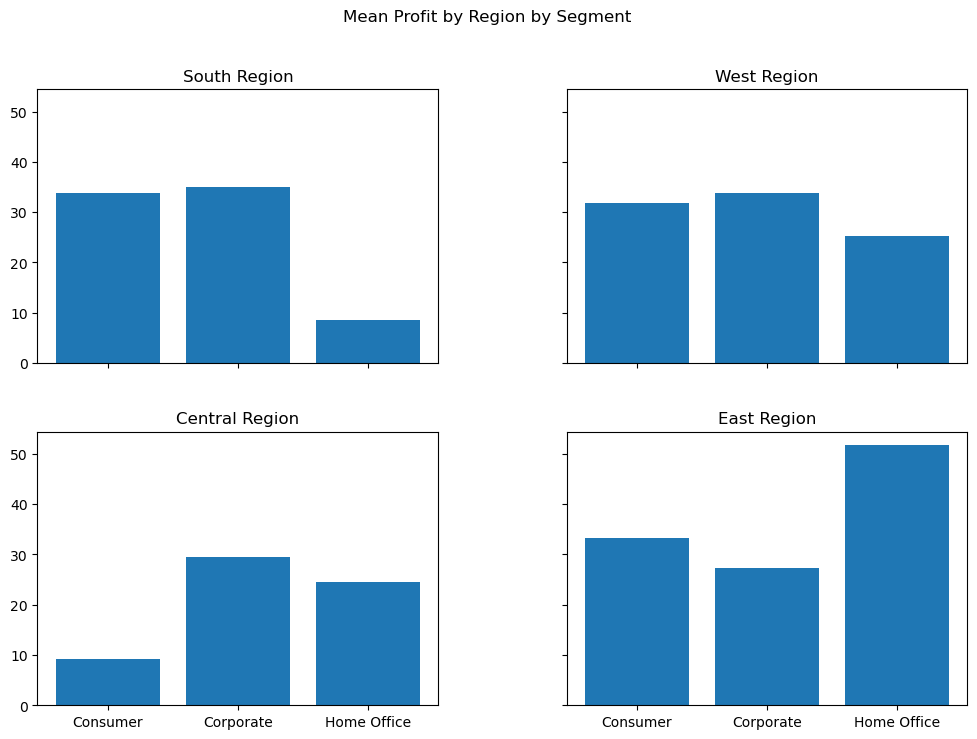

In [69]:
fig, axs = plt.subplots(2,2, sharey=True, sharex=True, figsize=(12,8))
axsIdx = [[0,0], [0,1], [1,0], [1,1]]
plt.subplots_adjust(wspace=0.32,hspace=0.25);

for idx, region in enumerate(regions):
    data = dfByRegionSegment['Profit'].mean()[region]
    axs[axsIdx[idx][0],axsIdx[idx][1]].bar(data.index, data.values)
    axs[axsIdx[idx][0],axsIdx[idx][1]].title.set_text(f"{region} Region")
    
plt.suptitle("Mean Profit by Region by Segment")
plt.show()

In [70]:
# Each Region having its own Advantages and Disadvantages

In [77]:
# Now, Finding and Treating the Null values

In [78]:
raw_train.isnull().sum()

Order Date          0
order_month_year    0
order_day           0
order_month         0
order_year          0
Ship Date           0
Ship Mode           0
ship_day            0
ship_month          0
ship_year           0
ship_month_year     0
Segment             0
Country             0
City                0
State               0
Postal Code         0
Region              0
Category            0
Sub-Category        0
Sales               0
Quantity            0
Discount            0
Profit              0
dtype: int64

In [80]:
# Outliears Treatment(as we saw outliers in Univariate Analysis)

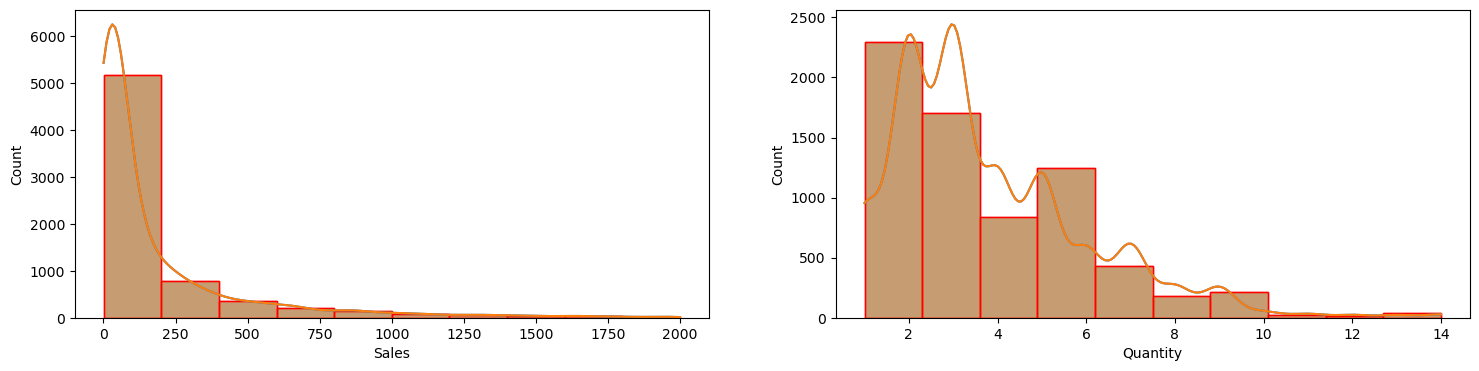

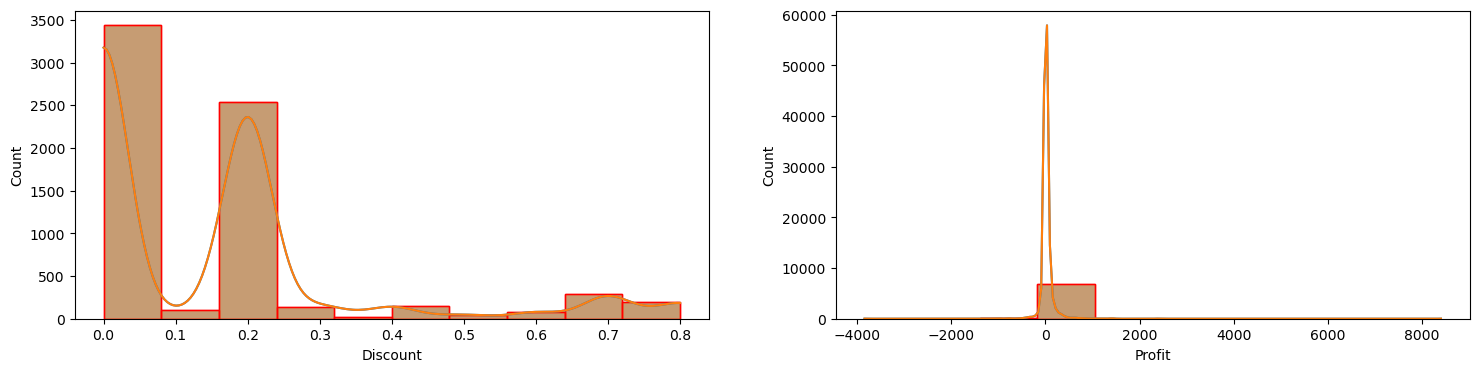

In [82]:
#outlier visualisation
plt.figure(10, figsize=(18, 4))
plt.subplots_adjust(wspace=0.2)
sns.histplot(data=raw_train[raw_train['Sales'] <= 2000], x='Sales', ax=plt.subplot(121),bins=10, kde=True, edgecolor='red');
sns.histplot(data=raw_train, x='Quantity', ax=plt.subplot(122), bins=10, kde=True, edgecolor='red');

plt.figure(11, figsize=(18, 4))
plt.subplots_adjust(wspace=0.2)
sns.histplot(data=raw_train, x='Discount', ax=plt.subplot(121), bins=10, kde=True, edgecolor='red');
sns.histplot(data=raw_train, x='Profit', ax=plt.subplot(122), bins=10, kde=True, edgecolor='red');
plt.show()

In [83]:
# We can see it is not normally distributed and bulk of the data is on the left side

In [84]:
# Here, We will be using Box-Cox Transformation

In [85]:
# For the purposes of carrying out the transformation it seemed useful to separate the particular code into a function, 
# and that is what we did here with the data_transform() function.

In [86]:
def data_transform(dataFrame):
    posData = dataFrame[dataFrame > 0]
    bcData, lam = stats.boxcox(posData)
    dataFrame[dataFrame > 0] = bcData
    dataFrame[dataFrame <= 0] = -1/lam
    return dataFrame

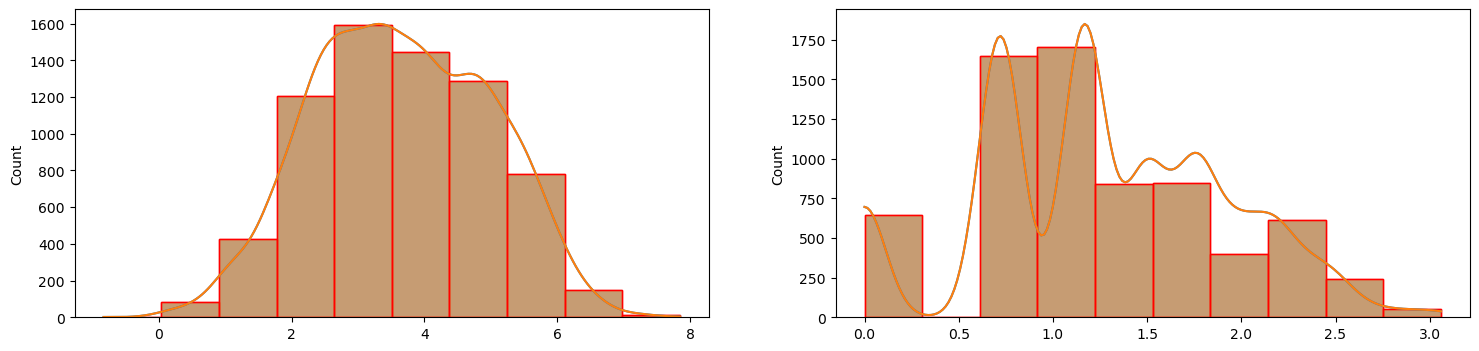

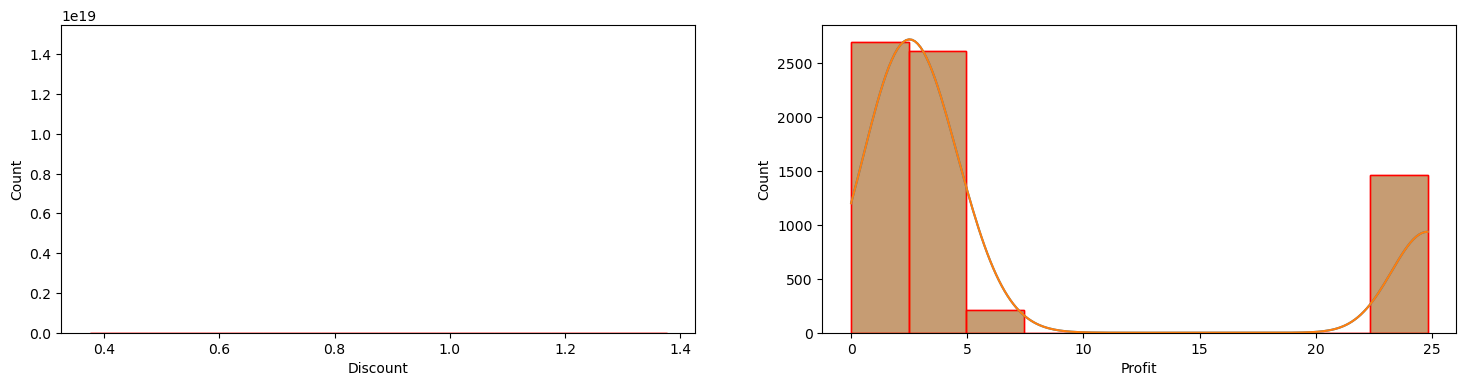

In [88]:
plt.figure(13, figsize=(18, 4))
plt.subplots_adjust(wspace=0.2)
sns.histplot(data=stats.boxcox(raw_train['Sales'])[0], ax=plt.subplot(121),bins=10, kde=True, edgecolor='red');
sns.histplot(data=stats.boxcox(raw_train['Quantity'])[0], ax=plt.subplot(122), bins=10, kde=True, edgecolor='red');

plt.figure(14, figsize=(18, 4))
plt.subplots_adjust(wspace=0.2)
sns.histplot(data=data_transform(raw_train['Discount'].copy()), ax=plt.subplot(121), bins=10, kde=True, edgecolor='red');
sns.histplot(data=data_transform(raw_train['Profit'].copy()), ax=plt.subplot(122), bins=10, kde=True, edgecolor='red');
plt.show()

In [89]:
# Now, Distribution looks normal.

In [90]:
# add this transformed data to our raw_train and build a linear regression model and make predictions.

In [91]:
#adding column for loss and changing 'Profit' accodingly to raw_train
raw_train['Loss'] = raw_train[raw_train['Profit'] < 0]['Profit'].abs()
raw_train['Loss'].fillna(value=0, inplace=True)
raw_train['Profit'] = np.where(raw_train['Profit'] < 0, 0, raw_train['Profit'])

#adding column for loss and changing 'Profit' accodingly to raw_test
raw_test['Loss'] = raw_test[raw_test['Profit'] < 0]['Profit'].abs()
raw_test['Loss'].fillna(value=0, inplace=True)
raw_test['Profit'] = np.where(raw_test['Profit'] < 0, 0, raw_test['Profit'])

# #performing transformations on train
raw_train['sales_transform'] = stats.boxcox(raw_train['Sales'])[0]
raw_train['quantity_transform'] = stats.boxcox(raw_train['Quantity'])[0]
raw_train['profit_transform'] = data_transform(raw_train['Profit'].copy())
raw_train['loss_transform'] = data_transform(raw_train['Loss'].copy())
raw_train['discount_transform'] = data_transform(raw_train['Discount'].copy())

#performing transformations on test
raw_test['quantity_transform'] = stats.boxcox(raw_test['Quantity'])[0]
raw_test['profit_transform'] = data_transform(raw_test['Profit'].copy())
raw_test['loss_transform'] = data_transform(raw_test['Loss'].copy())
raw_test['discount_transform'] = data_transform(raw_test['Discount'].copy())

raw_train.head()

,Order Date,order_month_year,order_day,order_month,order_year,Ship Date,Ship Mode,ship_day,ship_month,ship_year,...,Sales,Quantity,Discount,Profit,Loss,sales_transform,quantity_transform,profit_transform,loss_transform,discount_transform
0,2016-11-08,2016-11,8,11,2016,2016-11-11,Second Class,11,11,2016,...,261.9600,2,0.00,41.9136,0.000,4.846044,0.720108,3.467992,18.007710,0.876154
1,2016-11-08,2016-11,8,11,2016,2016-11-11,Second Class,11,11,2016,...,731.9400,3,0.00,219.5820,0.000,5.599140,1.167367,4.846120,18.007710,0.876154
2,2016-06-12,2016-06,12,6,2016,2016-06-16,Second Class,16,6,2016,...,14.6200,2,0.00,6.8714,0.000,2.506658,0.720108,1.854410,18.007710,0.876154
3,2015-10-11,2015-10,11,10,2015,2015-10-18,Standard Class,18,10,2015,...,957.5775,5,0.45,0.0000,383.031,5.789649,1.759841,24.811465,5.065545,0.876154
4,2015-10-11,2015-10,11,10,2015,2015-10-18,Standard Class,18,10,2015,...,22.3680,2,0.20,2.5164,0.000,2.873425,0.720108,0.905878,18.007710,0.876154


In [92]:
raw_test.head()

,Order Date,order_month_year,order_day,order_month,order_year,Ship Date,Ship Mode,ship_day,ship_month,ship_year,...,Category,Sub-Category,Quantity,Discount,Profit,Loss,quantity_transform,profit_transform,loss_transform,discount_transform
6994,2015-11-08,2015-11,8,11,2015,2015-11-13,Second Class,13,11,2015,...,Office Supplies,Art,5,0.0,6.9750,0.000,1.711211,1.865090,13.384020,0.947894
6995,2015-11-19,2015-11,19,11,2015,2015-11-26,Standard Class,26,11,2015,...,Office Supplies,Appliances,4,0.0,8.3916,0.000,1.461372,2.034820,13.384020,0.947894
6996,2017-12-23,2017-12,23,12,2017,2017-12-25,Second Class,25,12,2017,...,Office Supplies,Binders,4,0.8,0.0000,22.144,1.461372,23.769219,2.765244,0.947894
6997,2017-12-23,2017-12,23,12,2017,2017-12-25,Second Class,25,12,2017,...,Office Supplies,Paper,4,0.2,63.7536,0.000,1.461372,3.812130,13.384020,0.947894
6998,2016-09-16,2016-09,16,9,2016,2016-09-22,Standard Class,22,9,2016,...,Office Supplies,Paper,2,0.0,6.3504,0.000,0.711588,1.778466,13.384020,0.947894


In [93]:
print('Shape of raw_train: ', raw_train.shape)
print('Shape of raw_test: ', raw_test.shape) #27 because test doesn't have 'Sales' and 'sales_tranform'

Shape of raw_train:  (6992, 29)
Shape of raw_test:  (3000, 27)


In [97]:
# Model Building

In [98]:
# Now, We need to convert the string data to numerical data

In [99]:
# Here, we will use Label Encoding has it simple and gets the job done.

In [100]:
from sklearn.preprocessing import LabelEncoder

X = raw_train.drop(['Order Date', 'order_month_year', 'Ship Date', 'ship_month_year', 'Sales', 'sales_transform'], axis=1)
for col in X.columns:
    if X[col].dtype == 'object':
        lb = LabelEncoder() # Shift + Tab
        X[col + '_encoded'] = lb.fit_transform(X[col].values)
        X.drop(columns=col, inplace=True)
        
y = raw_train['Sales']

X.shape, y.shape

((6992, 23), (6992,))

In [101]:
y.head()

0    261.9600
1    731.9400
2     14.6200
3    957.5775
4     22.3680
Name: Sales, dtype: float64

In [102]:
!pip3 install prettytable
!pip3 install xgboost

In [103]:
#helper functions

models_results_rmse = {}
models_results_r2 = {}

def evaluate(y_t, y_p, title):
    table = PrettyTable()
    table.field_names = ['Metric', 'Value']
    
    rmse = mean_squared_error(y_t, y_p, squared=False).round(4)
    r2 = r2_score(y_t, y_p).round(4)
    
    table.add_row(['RMSE', rmse])
    table.add_row(['R2 Score', r2])
    
    models_results_rmse[title] = rmse
    models_results_r2[title] = r2
    
    print(table)
    
    
def plot_forecasted_sales(y_pred, y_train, y_true=[], period=5, title=''):
    
    # plot
    plt.figure(figsize=(20, 8))
    plt.plot(y_train.to_list(), color=colors[0])
    plt.plot([None for i in y_train] + [x for x in y_pred], color=colors[2])
    
    # set legend
    if len(y_true) > 0:
        plt.plot([None for i in y_train] + [x for x in y_true], color=colors[1])
        plt.legend(['2014-2016 Acual SALES', '2017 Acual SALES', f'2017 Forecasted SALES \
(RMSE = {mean_squared_error(y_true, y_pred, squared=False).round(1)}, R2 = {r2_score(y_true, y_pred).round(3)})'])
    else:
        plt.legend(['2014-2017 Actual SALES', '2018-2020 Forecasted SALES'])
    
    # set parameters
    plt.xticks(range(0, len(y_train) + len(y_pred), period), rotation=75)
    plt.xlabel('Week')
    plt.ylabel('Sales')
    plt.title(title)
    plt.show()

In [105]:
# Splitting the Data into training(80%) and testing(20%)

In [106]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size =0.2, random_state=1)

In [109]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Train the model
modelLR = LinearRegression() 
modelLR.fit(X_train, y_train)

# Predict
y_pred = modelLR.predict(X_test)

# Correct evaluate() function
def evaluate(y_test, y_pred, title='Linear Regression'):
    mse = mean_squared_error(y_test, y_pred)     # MSE (no squared argument)
    rmse = np.sqrt(mse)                          # RMSE manually
    r2 = r2_score(y_test, y_pred)

    print(f"\n--- {title} ---")
    print("Mean Squared Error (MSE):", mse)
    print("Root Mean Squared Error (RMSE):", rmse)
    print("R2 Score:", r2)

# Call evaluate
evaluate(y_test, y_pred, title='Linear Regression')



--- Linear Regression ---
Mean Squared Error (MSE): 112121.91604925827
Root Mean Squared Error (RMSE): 334.8461080097218
R2 Score: 0.6988240860144843


In [110]:
from sklearn.tree import DecisionTreeRegressor

modelDTR = DecisionTreeRegressor(max_depth=3)
modelDTR.fit(X_train, y_train)
y_pred = modelDTR.predict(X_test)

evaluate(y_test, y_pred, title='Decision Tree Regression')


--- Decision Tree Regression ---
Mean Squared Error (MSE): 170044.09749324404
Root Mean Squared Error (RMSE): 412.3640351597652
R2 Score: 0.5432366098892698


In [111]:
from sklearn.ensemble import RandomForestRegressor

modelRFR = RandomForestRegressor(max_depth=10)
modelRFR.fit(X_train, y_train)
y_pred = modelRFR.predict(X_test)

evaluate(y_test, y_pred, title='Random Forest Regression')


--- Random Forest Regression ---
Mean Squared Error (MSE): 83414.96012143359
Root Mean Squared Error (RMSE): 288.8164817343941
R2 Score: 0.7759351807402127


In [112]:
from sklearn.svm import SVR

modelSVR = SVR()
modelSVR.fit(X_train, y_train)
y_pred = modelSVR.predict(X_test)

evaluate(y_test, y_pred, title='Support Vector Regression')


--- Support Vector Regression ---
Mean Squared Error (MSE): 397147.3904765932
Root Mean Squared Error (RMSE): 630.1963110623492
R2 Score: -0.06679614948073054


In [113]:
modelXGB = XGBRegressor()
modelXGB.fit(X_train, y_train)
y_pred = modelXGB.predict(X_test)

evaluate(y_test, y_pred, title='XGBoost')


--- XGBoost ---
Mean Squared Error (MSE): 119619.67670265502
Root Mean Squared Error (RMSE): 345.86077647321474
R2 Score: 0.6786840010319968


# Conclusion:
#            R2 Score of Random Forest Regression is the Highest 
#            So, it is the Best Performed Model...